<a href="https://www.kaggle.com/code/mesutssmn/heart-attack-prediction?scriptVersionId=168195522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports and DataFrame Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Dataset Knowledge

age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output : 0= less chance of heart attack 1= more chance of heart attack



# Data Analysis

In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [5]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    print(dataframe[numeric_columns].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

##################### Shape #####################
(303, 14)
##################### Types #####################
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
##################### Head #####################
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0    2.300    0   
1   37    1   2     130   250    0        1       187     0    3.500    0   
2   41    0   1     130   204    0        0       172     0    1.400    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
##################### Tail #####################
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
300   68    1 

In [7]:
def grab_col_names(dataframe, cat_th=7, car_th=15):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

In [8]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 303
Variables: 14
cat_cols: 9
num_cols: 5
cat_but_car: 0
num_but_cat: 9


In [9]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

     sex  Ratio
sex            
1    207 68.317
0     96 31.683


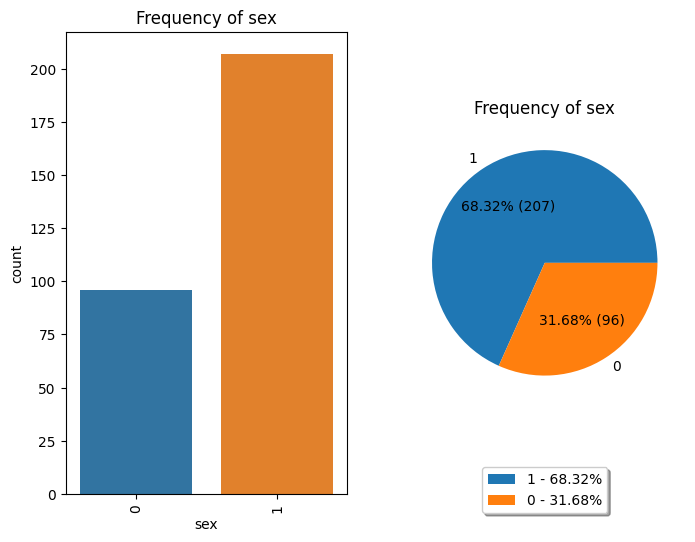

     cp  Ratio
cp            
0   143 47.195
2    87 28.713
1    50 16.502
3    23  7.591


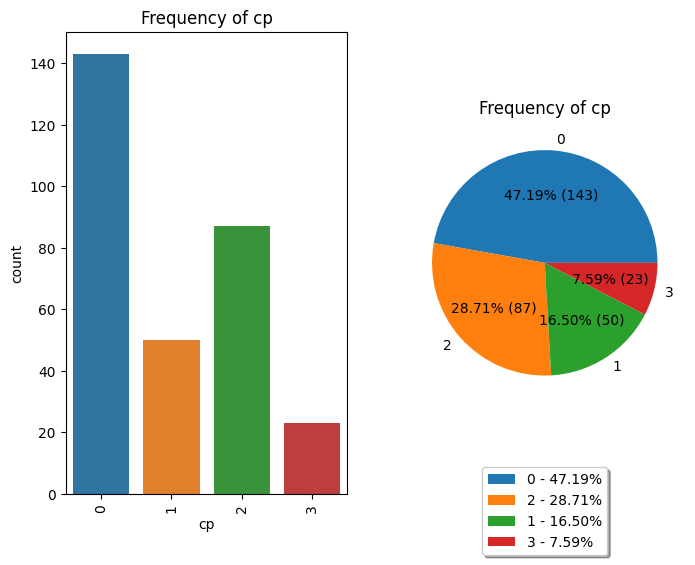

     fbs  Ratio
fbs            
0    258 85.149
1     45 14.851


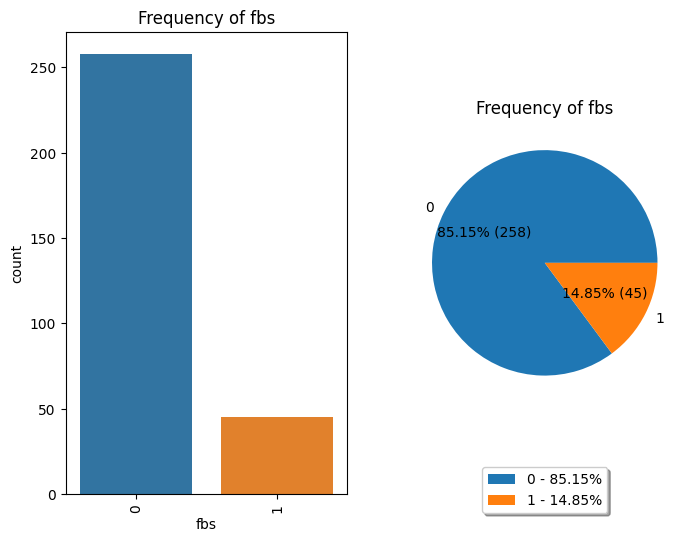

         restecg  Ratio
restecg                
1            152 50.165
0            147 48.515
2              4  1.320


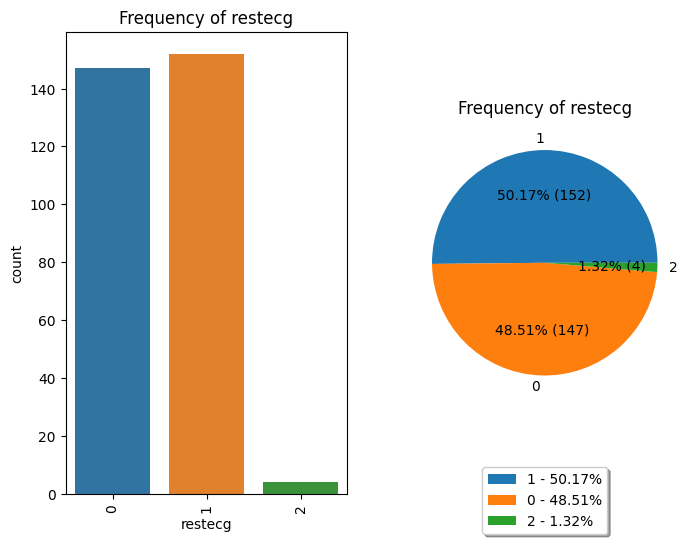

      exng  Ratio
exng             
0      204 67.327
1       99 32.673


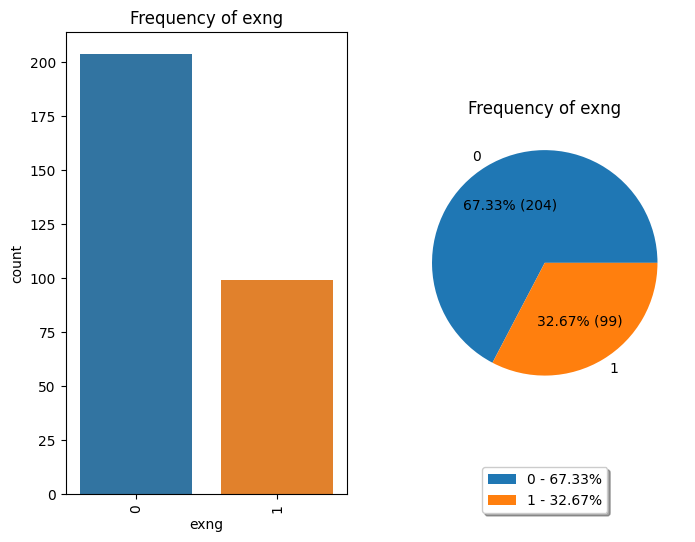

     slp  Ratio
slp            
2    142 46.865
1    140 46.205
0     21  6.931


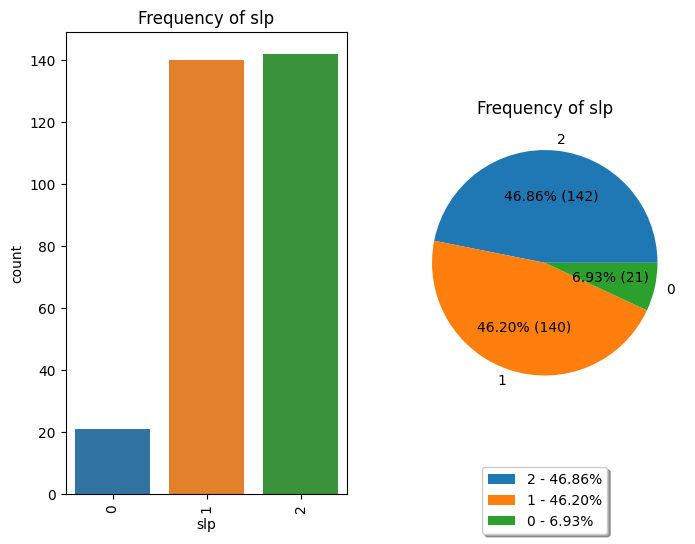

     caa  Ratio
caa            
0    175 57.756
1     65 21.452
2     38 12.541
3     20  6.601
4      5  1.650


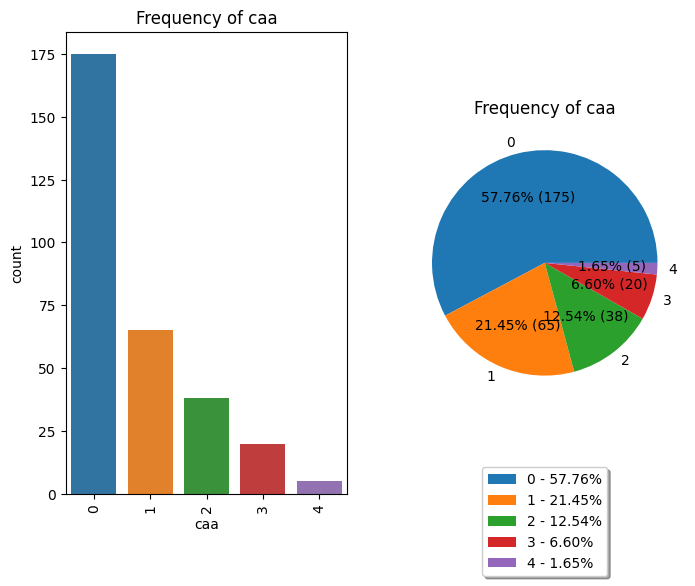

       thall  Ratio
thall              
2        166 54.785
3        117 38.614
1         18  5.941
0          2  0.660


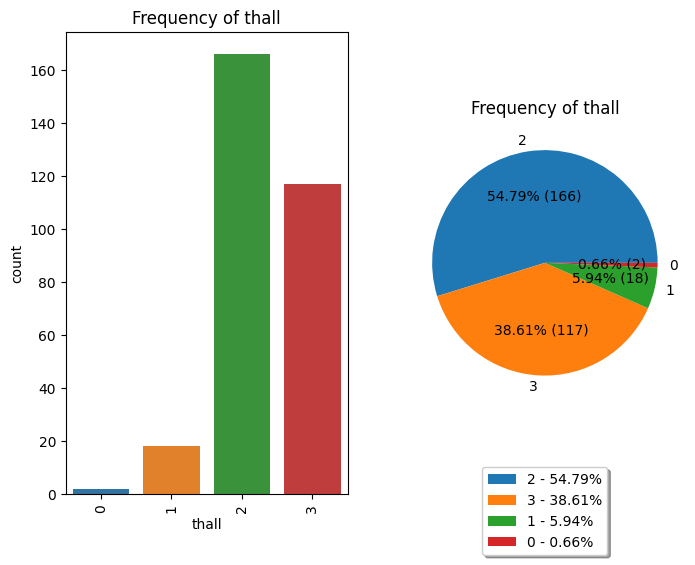

        output  Ratio
output               
1          165 54.455
0          138 45.545


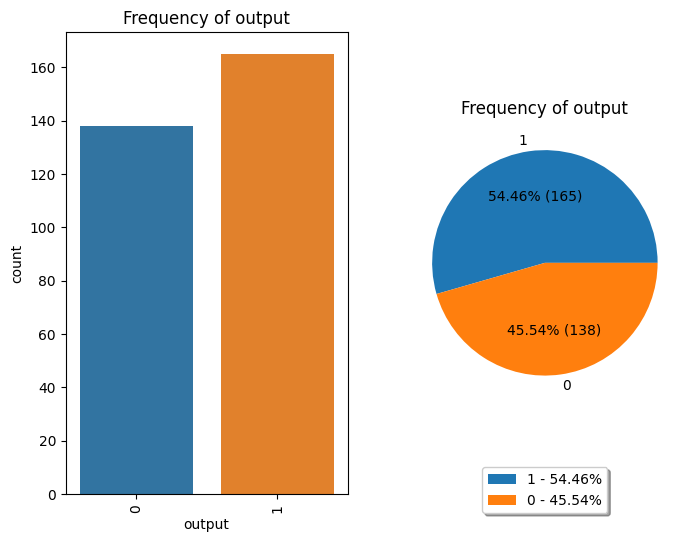

In [10]:
for col in cat_cols:
    cat_summary(df, col, True)

In [11]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

    print("#####################################")

count   303.000
mean     54.366
std       9.082
min      29.000
5%       39.100
10%      42.000
20%      45.000
30%      50.000
40%      53.000
50%      55.000
60%      58.000
70%      59.000
80%      62.000
90%      66.000
95%      68.000
99%      71.000
max      77.000
Name: age, dtype: float64


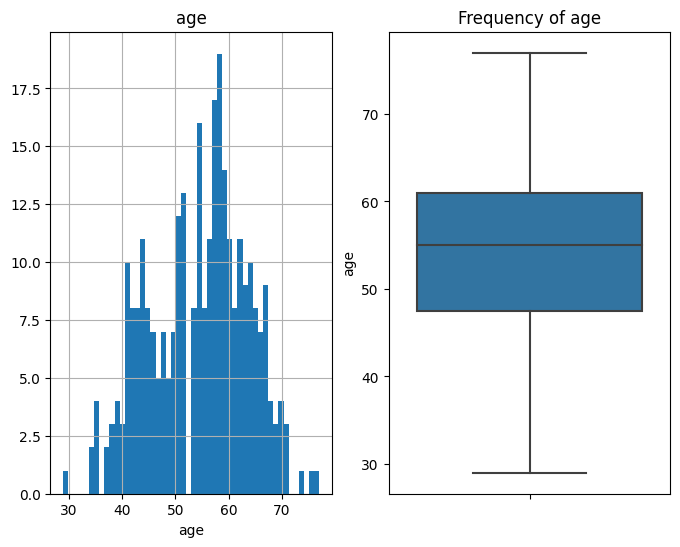

#####################################
count   303.000
mean    131.624
std      17.538
min      94.000
5%      108.000
10%     110.000
20%     120.000
30%     120.000
40%     126.000
50%     130.000
60%     134.000
70%     140.000
80%     144.000
90%     152.000
95%     160.000
99%     180.000
max     200.000
Name: trtbps, dtype: float64


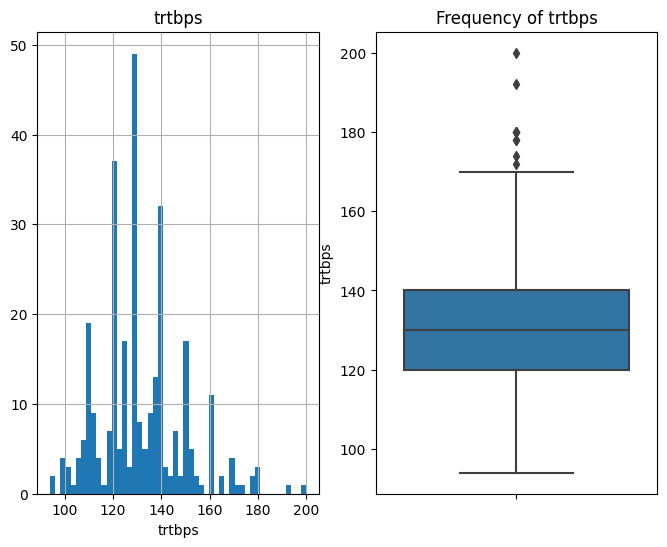

#####################################
count   303.000
mean    246.264
std      51.831
min     126.000
5%      175.000
10%     188.000
20%     204.000
30%     217.600
40%     230.000
50%     240.000
60%     254.000
70%     268.000
80%     285.200
90%     308.800
95%     326.900
99%     406.740
max     564.000
Name: chol, dtype: float64


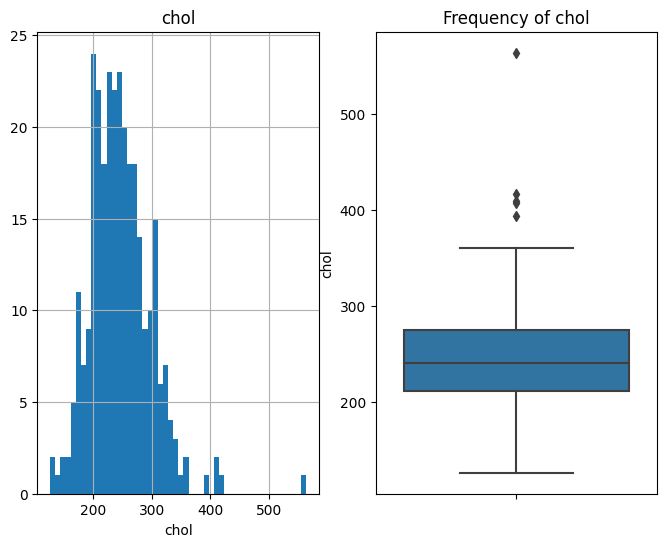

#####################################
count   303.000
mean    149.647
std      22.905
min      71.000
5%      108.100
10%     116.000
20%     130.000
30%     140.600
40%     146.000
50%     153.000
60%     159.000
70%     163.000
80%     170.000
90%     176.600
95%     181.900
99%     191.960
max     202.000
Name: thalachh, dtype: float64


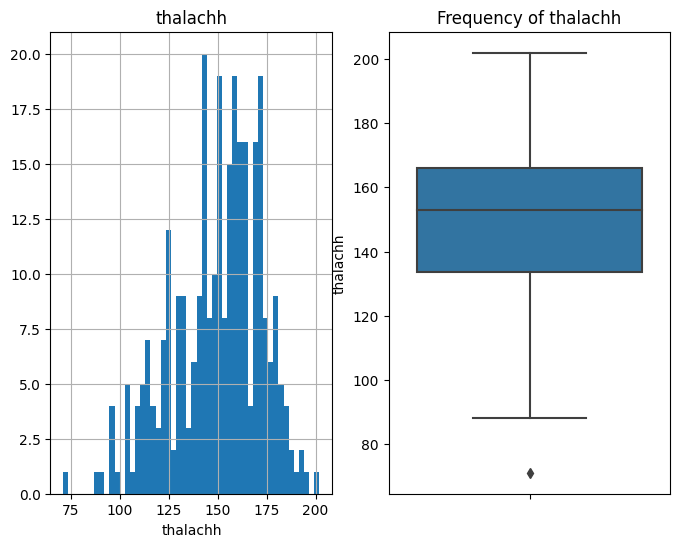

#####################################
count   303.000
mean      1.040
std       1.161
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.380
50%       0.800
60%       1.120
70%       1.400
80%       1.900
90%       2.800
95%       3.400
99%       4.200
max       6.200
Name: oldpeak, dtype: float64


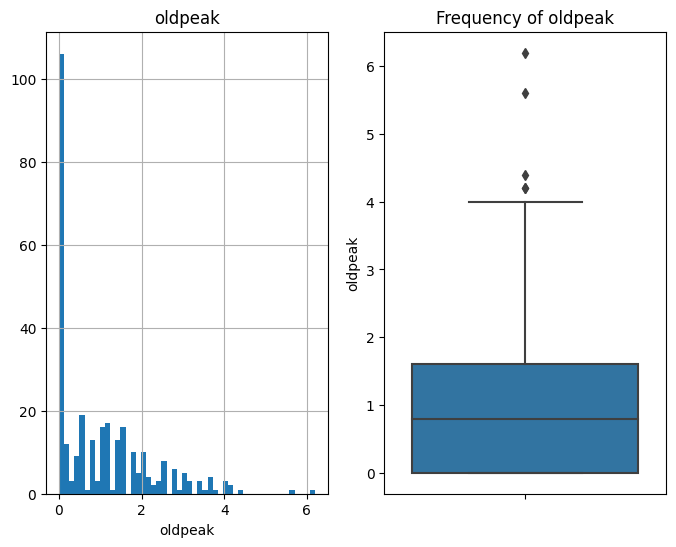

#####################################


In [12]:
for col in num_cols:
    num_summary(df, col, True)

In [13]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [14]:
for col in cat_cols:
    target_summary_with_cat(df,"output",col)

     TARGET_MEAN
sex             
0          0.750
1          0.449


    TARGET_MEAN
cp             
0         0.273
1         0.820
2         0.793
3         0.696


     TARGET_MEAN
fbs             
0          0.550
1          0.511


         TARGET_MEAN
restecg             
0              0.463
1              0.632
2              0.250


      TARGET_MEAN
exng             
0           0.696
1           0.232


     TARGET_MEAN
slp             
0          0.429
1          0.350
2          0.754


     TARGET_MEAN
caa             
0          0.743
1          0.323
2          0.184
3          0.150
4          0.800


       TARGET_MEAN
thall             
0            0.500
1            0.333
2            0.783
3            0.239


        TARGET_MEAN
output             
0             0.000
1             1.000




In [15]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

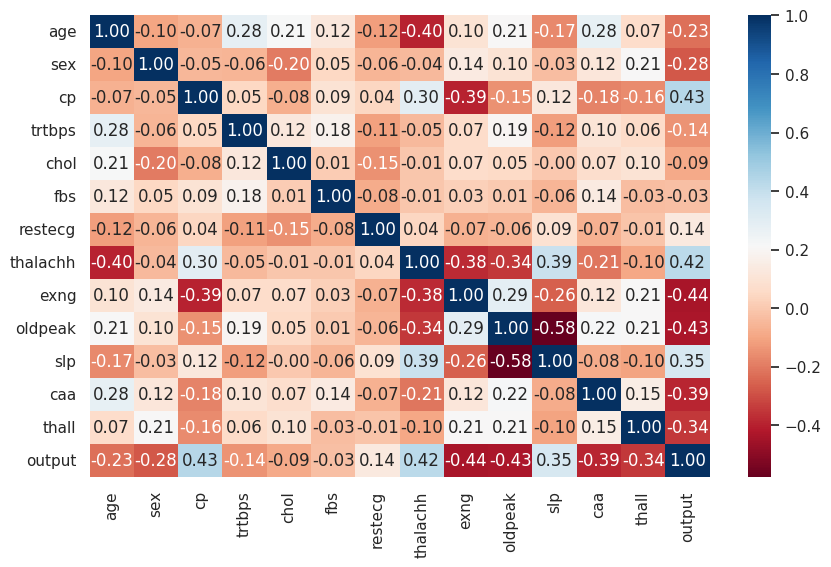

In [16]:
corr = df.corr()
corr
sns.set(rc={'figure.figsize': (10, 6)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()

In [17]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [18]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [19]:
for col in num_cols:
    if col != "output":
      print(col, check_outlier(df, col))

age False
trtbps False
chol True
thalachh False
oldpeak False


In [20]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [21]:
for col in num_cols:
    if col != "output":
        replace_with_thresholds(df,col)

In [22]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [23]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [24]:
target_column = df['output']
df.drop("output", axis=1, inplace=True)

In [25]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

Observations: 303
Variables: 13
cat_cols: 8
num_cols: 5
cat_but_car: 0
num_but_cat: 8


In [26]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dfd = one_hot_encoder(df, cat_cols, drop_first=True)

In [27]:
binary_cols = [col for col in dfd.columns if dfd[col].dtypes == "O" and len(dfd[col].unique()) == 2]

for col in binary_cols:
    label_encoder(dfd, col)

In [28]:
binary_cols

[]

In [29]:
dfd = pd.concat([dfd, target_column], axis=1)

In [30]:
dfd.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output
0,63.000,145,233.000,150.000,2.300,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,1
1,37.000,130,250.000,187.000,3.500,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,1
2,41.000,130,204.000,172.000,1.400,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1
3,56.000,120,236.000,178.000,0.800,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,1
4,57.000,120,354.000,163.000,0.600,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,1


In [31]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trtbps     303 non-null    int64  
 2   chol       303 non-null    float64
 3   thalachh   303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_1      303 non-null    bool   
 6   cp_1       303 non-null    bool   
 7   cp_2       303 non-null    bool   
 8   cp_3       303 non-null    bool   
 9   fbs_1      303 non-null    bool   
 10  restecg_1  303 non-null    bool   
 11  restecg_2  303 non-null    bool   
 12  exng_1     303 non-null    bool   
 13  slp_1      303 non-null    bool   
 14  slp_2      303 non-null    bool   
 15  caa_1      303 non-null    bool   
 16  caa_2      303 non-null    bool   
 17  caa_3      303 non-null    bool   
 18  caa_4      303 non-null    bool   
 19  thall_1    303 non-null    bool   
 20  thall_2   

In [32]:
for i in dfd.columns:
    if dfd[i].dtype == bool:  
        dfd[i] = dfd[i].astype(int) 

In [33]:
dfd["age"] = dfd["age"].astype(int)

In [34]:
dfd.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output
0,63,145,233.000,150.000,2.300,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,37,130,250.000,187.000,3.500,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,41,130,204.000,172.000,1.400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,56,120,236.000,178.000,0.800,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,57,120,354.000,163.000,0.600,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1


In [35]:
y = dfd['output']
X = dfd.drop(["output"], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

2024-03-21 19:19:35.483960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 19:19:35.484078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 19:19:35.810426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Mini ANN

In [39]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Adding dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.5000 - loss: 0.7248

I0000 00:00:1711048798.474426      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711048798.492026      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.5468 - loss: 0.7432

W0000 00:00:1711048802.180782      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - accuracy: 0.5471 - loss: 0.7492 - val_accuracy: 0.6327 - val_loss: 0.6663
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6236 - loss: 0.6279 - val_accuracy: 0.6531 - val_loss: 0.6292
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6198 - loss: 0.6353 - val_accuracy: 0.7347 - val_loss: 0.6020
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6721 - loss: 0.6191 - val_accuracy: 0.7347 - val_loss: 0.5775
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6345 - loss: 0.6162 - val_accuracy: 0.7551 - val_loss: 0.5564
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6597 - loss: 0.6250 - val_accuracy: 0.7959 - val_loss: 0.5367
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7272 - loss: 0.5486 - val_accuracy: 0.8163 - val_loss: 0.5213
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7041 - loss: 0.6076 - val_accuracy: 0.8163 - val_loss: 0.5083
Epoch 9/50
7/7 ━━

# ML Models

In [42]:
models = [('LR', LogisticRegression()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.06)),
          ("XGBoost", XGBClassifier(learning_rate=0.06)),
          ("LightGBM", LGBMClassifier(learning_rate=0.06, verbose=0)),
          ("CatBoost", CatBoostClassifier(learning_rate=0.06,verbose=False))]

In [43]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")

ACC: 0.8058 (LR) 
ACC: 0.7974 (RF) 
ACC: 0.797 (GBM) 
ACC: 0.818 (XGBoost) 
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

## Logitic Regression

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
lr_accuracy

88.52

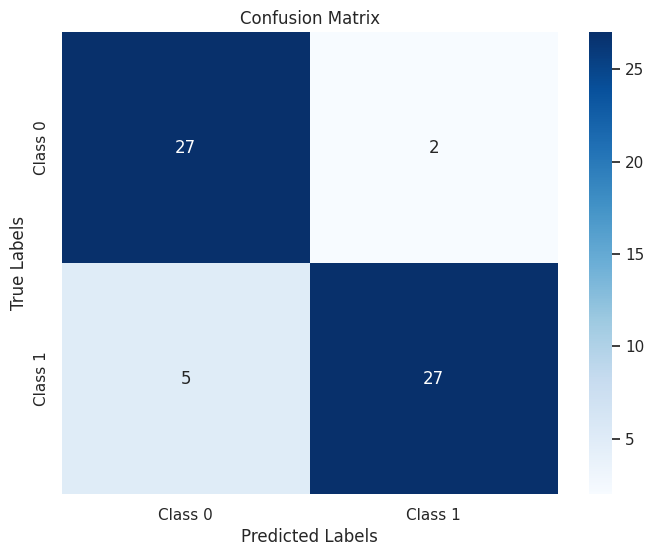

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## XGB

In [46]:
xgb = XGBClassifier(learning_rate = 0.05)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
xgb_accuracy

83.61

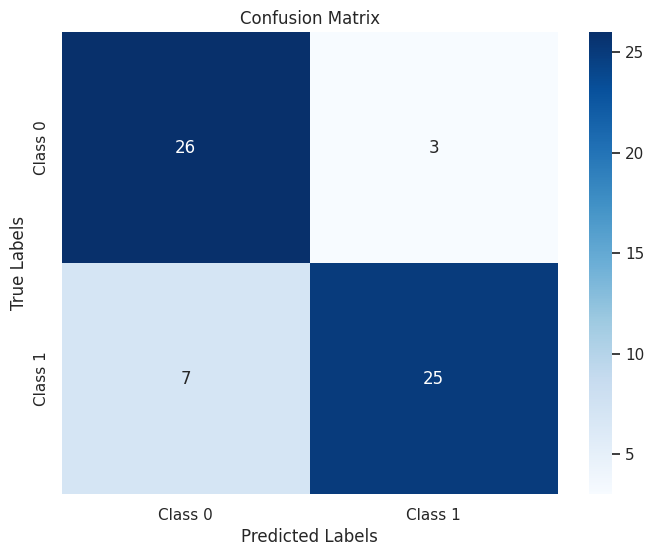

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## LGBM

In [48]:
lgbm = LGBMClassifier(learning_rate = 0.1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

lgbm_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
lgbm_accuracy

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

88.52

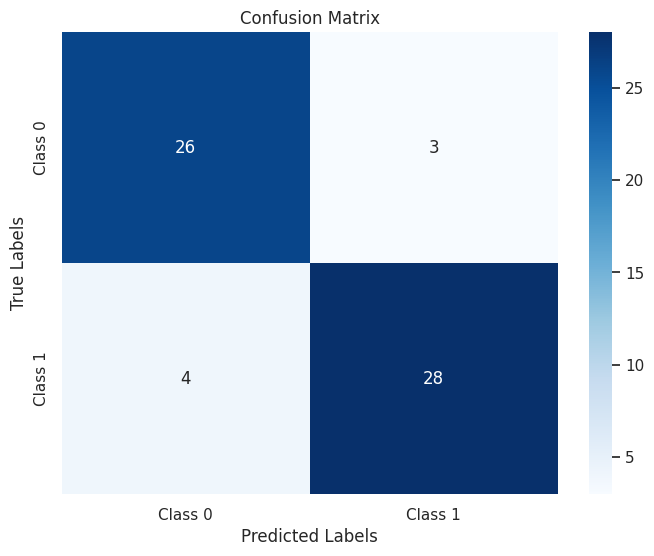

In [49]:
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## CatBoost

In [50]:
CatBoost = CatBoostClassifier(learning_rate=0.03,verbose=0)
CatBoost.fit(X_train, y_train)
y_pred = CatBoost.predict(X_test)

CatBoost_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
CatBoost_accuracy

86.89

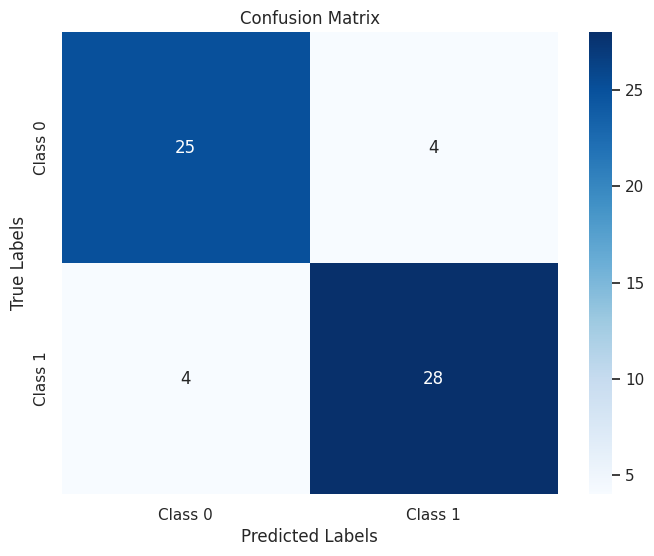

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ANN

In [52]:
X_train.shape[1]

22

In [53]:
model = tf.keras.Sequential()
input_layer = tf.keras.layers.Dense(22, input_shape=(X_train_scaled.shape[1],), activation="relu")
model.add(input_layer)

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=25,
    restore_best_weights=True)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,975,419 (7.54 MB)

 Trainable params: 1,975,419 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(X_train_scaled, y_train,
                    callbacks=[early_stopping],
                    epochs=100, verbose=1, batch_size=8, validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 487ms/step - accuracy: 0.4974 - loss: 0.6964 - val_accuracy: 0.7347 - val_loss: 0.6310
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7014 - loss: 0.5577 - val_accuracy: 0.8367 - val_loss: 0.4761
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7579 - loss: 0.4878 - val_accuracy: 0.7755 - val_loss: 0.7692
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7783 - loss: 0.6168 - val_accuracy: 0.7959 - val_loss: 0.6984
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7592 - loss: 0.4974 - val_accuracy: 0.7959 - val_loss: 0.5084
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8525 - loss: 0.3751 - val_accuracy: 0.8163 - val_loss: 0.4884
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8645 - loss: 0.3409 - val_accuracy: 0.7959 - val_loss: 0.4276
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.3430 - val_accuracy: 0.7755 

In [55]:
loss_and_metrics = model.evaluate(X_test_scaled, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.7812 - loss: 0.5283

W0000 00:00:1711048851.982993      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step - accuracy: 0.8069 - loss: 0.4652
[0.43370068073272705, 0.8196721076965332]
Loss =  0.43370068073272705
Accuracy =  0.8196721076965332


W0000 00:00:1711048852.465321      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


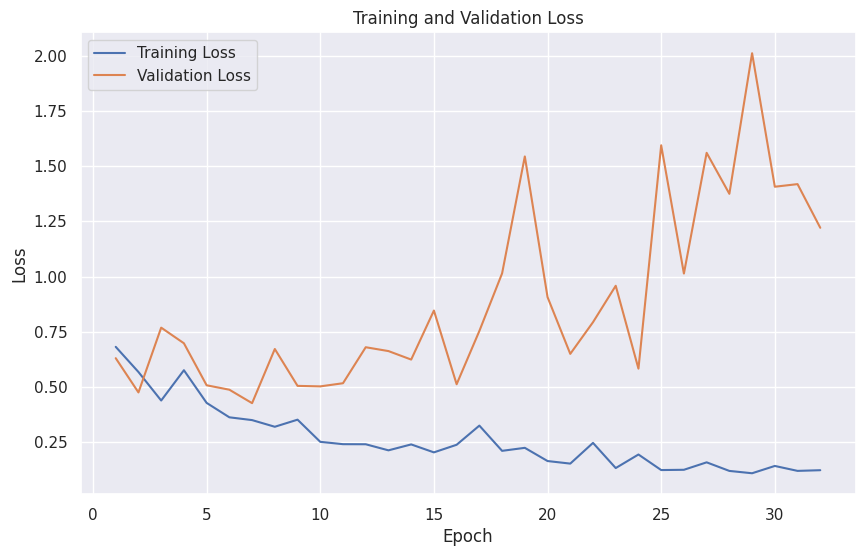

In [56]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [57]:
predicted_ann = model.predict(X_test_scaled)
predicted_ann = tf.squeeze(predicted_ann)
predicted_ann = np.array([1 if x >= 0.5 else 0 for x in predicted_ann])
actual = np.array(y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step

W0000 00:00:1711048853.467069      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step


W0000 00:00:1711048853.779976      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [58]:
predicted_ann

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

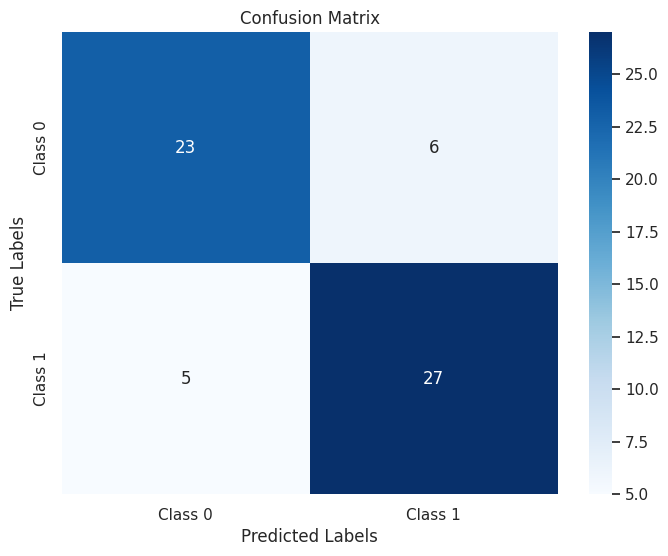

In [59]:
cm = confusion_matrix(y_test, predicted_ann)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# CNN

In [60]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(22, 1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(32, kernel_size=3, activation='relu'),

    Conv1D(16, kernel_size=2, activation='relu'),

    Flatten(),
    
    Dense(8, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid') 
])

In [62]:
model_cnn.compile(optimizer=Adam(learning_rate=0.01), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
print(X_train.shape)

(242, 22)


In [64]:
history = model_cnn.fit(X_train_scaled, y_train,
                    callbacks=[early_stopping],
                    epochs=200, verbose=1, batch_size=4, validation_split=0.2)

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.5362 - loss: 0.6953 - val_accuracy: 0.8367 - val_loss: 0.4275
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.5629 - val_accuracy: 0.8776 - val_loss: 0.3530
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: 0.4866 - val_accuracy: 0.7959 - val_loss: 0.4105
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - loss: 0.3843 - val_accuracy: 0.8571 - val_loss: 0.3915
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4228 - val_accuracy: 0.8776 - val_loss: 0.4437
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.3447 - val_accuracy: 0.7959 - val_loss: 0.4603
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 - loss: 0.3691 - val_accuracy: 0.8163 - val_loss: 0.5015
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3463 - val_accuracy: 0.7959 -

In [65]:
loss_and_metrics = model_cnn.evaluate(X_test_scaled, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.8605 - loss: 0.4335
[0.3627243638038635, 0.868852436542511]
Loss =  0.3627243638038635
Accuracy =  0.868852436542511


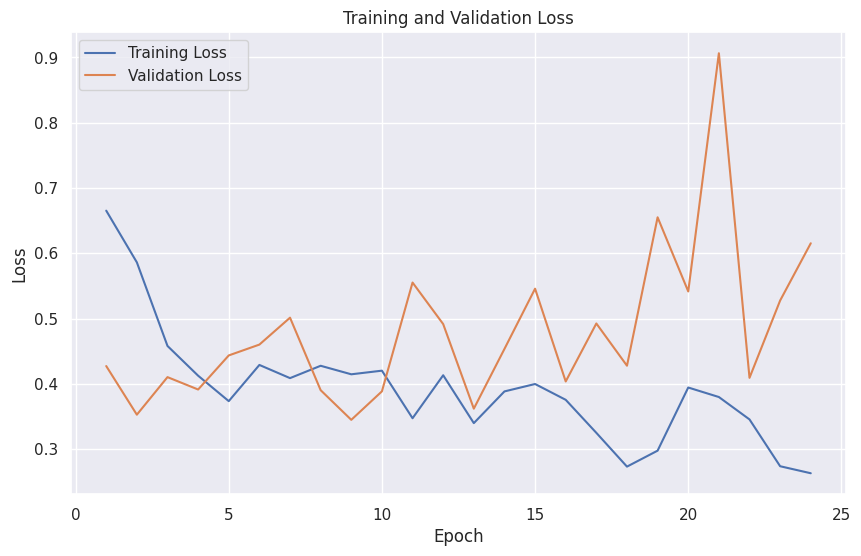

In [66]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [67]:
predicted_cnn = model_cnn.predict(X_test_scaled)
predicted_cnn = tf.squeeze(predicted_cnn)
predicted_cnn = np.array([1 if x >= 0.5 else 0 for x in predicted_cnn])
actual = np.array(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


In [68]:
predicted_cnn

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

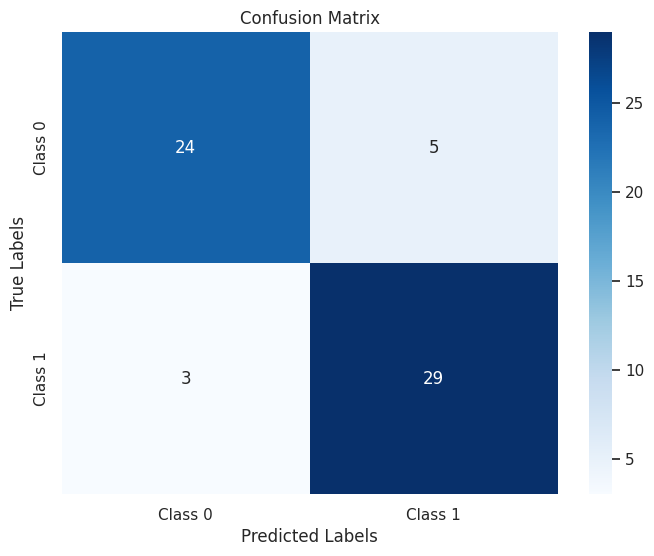

In [69]:
cm = confusion_matrix(y_test, predicted_cnn)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()